In [155]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from phik import phik_matrix
from sklearn.impute import SimpleImputer
from ydata_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score
import optuna
pd.set_option('display.max_columns', None)
sklearn.set_config(transform_output='pandas')
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [108]:
df = pd.read_csv('data/Ship_Performance_Dataset.csv')

In [109]:
df

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,NaN,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,NaN,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


In [110]:
df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [111]:
df.isna().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [112]:
df_t = df.copy()

In [113]:
si = SimpleImputer(strategy='most_frequent')
df_t = si.fit_transform(df_t)
df_t

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.35454,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.38758,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.78736,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.41815,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.40911,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.37516,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,Calm,218.309002,21029.021721,374365.37093,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,Calm,1630.646419,78883.312529,234120.365052,53.55109,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.23634,6.623856,Moderate,153.441965,25241.55025,799713.737211,14.335517,0.89567,0.90296,2,92.853622


In [114]:
# profile = ProfileReport(df)
# profile.to_file('clustering_report.html')

In [115]:
catcols = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

In [116]:
df_t.dtypes

Date                       object
Ship_Type                  object
Route_Type                 object
Engine_Type                object
Maintenance_Status         object
Speed_Over_Ground_knots    object
Engine_Power_kW            object
Distance_Traveled_nm       object
Draft_meters               object
Weather_Condition          object
Cargo_Weight_tons          object
Operational_Cost_USD       object
Revenue_per_Voyage_USD     object
Turnaround_Time_hours      object
Efficiency_nm_per_kWh      object
Seasonal_Impact_Score      object
Weekly_Voyage_Count        object
Average_Load_Percentage    object
dtype: object

In [117]:
df_t['Date'] = pd.to_datetime(df_t['Date'])

In [118]:
num_cols = ['Speed_Over_Ground_knots','Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Average_Load_Percentage', 'Weekly_Voyage_Count']

In [119]:
df_t[num_cols] = df_t[num_cols].astype(float)

In [120]:
df_t.dtypes

Date                       datetime64[ns]
Ship_Type                          object
Route_Type                         object
Engine_Type                        object
Maintenance_Status                 object
Speed_Over_Ground_knots           float64
Engine_Power_kW                   float64
Distance_Traveled_nm              float64
Draft_meters                      float64
Weather_Condition                  object
Cargo_Weight_tons                 float64
Operational_Cost_USD              float64
Revenue_per_Voyage_USD            float64
Turnaround_Time_hours             float64
Efficiency_nm_per_kWh             float64
Seasonal_Impact_Score             float64
Weekly_Voyage_Count               float64
Average_Load_Percentage           float64
dtype: object

interval columns not set, guessing: ['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']


<Axes: >

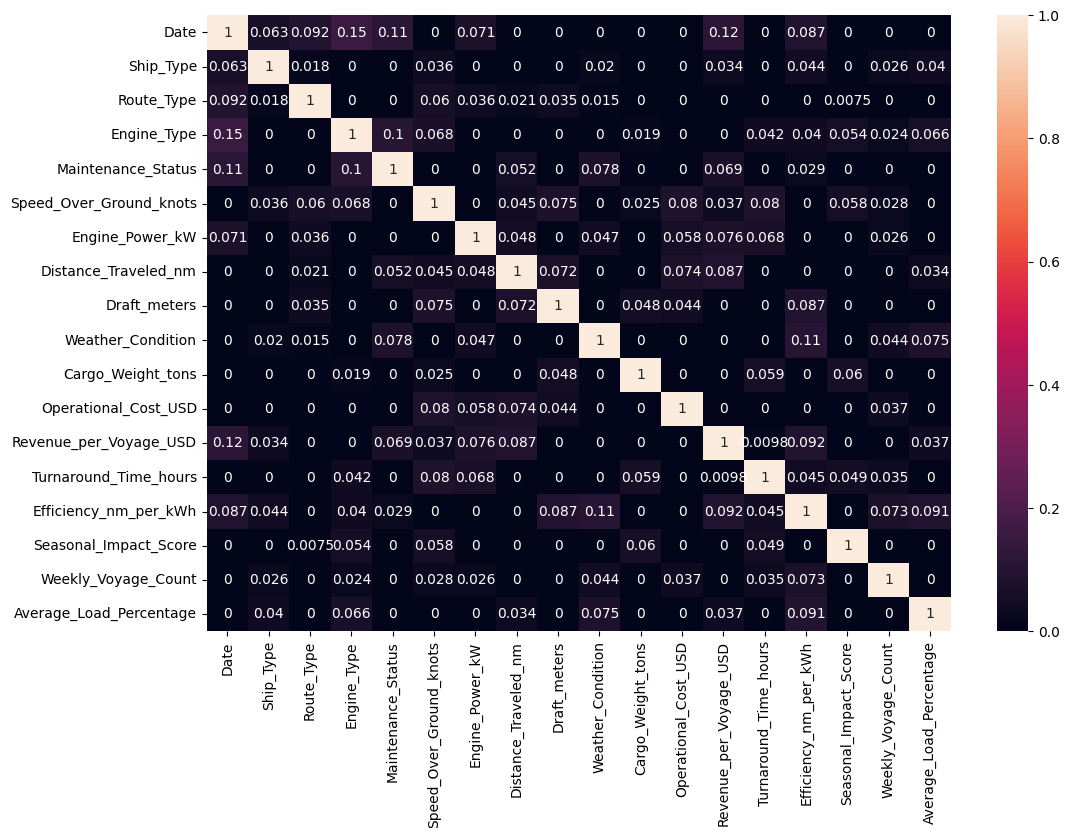

In [121]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_t.phik_matrix(), annot=True)

In [122]:
df_t['Date'] = (df_t["Date"] - df_t["Date"].min()).dt.days

In [142]:
df_t = round(df_t, 2)
df_t

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),2,12.60,2062.98,1030.94,14.13,1,1959.02,483832.35,292183.27,25.87,1.46,1.42,1.0,93.77
1,7,Fish Carrier,Short-haul,Steam Turbine,0,10.39,1796.06,1060.49,14.65,2,162.39,483388.00,883765.79,63.25,0.29,0.89,6.0,93.90
2,14,Container Ship,Long-haul,Diesel,1,20.75,1648.56,658.87,7.20,1,178.04,448543.40,394018.75,49.42,0.50,1.41,9.0,96.22
3,21,Bulk Carrier,Transoceanic,Steam Turbine,1,21.06,915.26,1126.82,11.79,1,1737.39,261349.61,87551.38,22.41,0.70,1.37,1.0,66.19
4,28,Fish Carrier,Transoceanic,Diesel,1,13.74,1089.72,1445.28,9.73,1,260.60,287718.38,676121.46,64.16,1.33,0.58,8.0,80.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,364,Tanker,Short-haul,Heavy Fuel Oil (HFO),0,11.61,2918.40,239.99,13.70,1,318.11,237975.07,731584.32,47.15,1.00,1.28,3.0,74.81
2732,371,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),0,13.85,2161.28,831.36,14.61,0,218.31,21029.02,374365.37,64.33,0.65,0.89,2.0,84.60
2733,378,Container Ship,Short-haul,Steam Turbine,2,16.81,1343.61,1376.46,9.31,0,1630.65,78883.31,234120.37,53.55,0.59,0.73,6.0,80.98
2734,385,Tanker,Transoceanic,Heavy Fuel Oil (HFO),0,23.13,2028.14,619.24,6.62,1,153.44,25241.55,799713.74,14.34,0.90,0.90,2.0,92.85


In [137]:
def encode(x):
    if x == 'Critical' or x == 'Rough':
        return 2
    elif x == 'Moderate' or x == 'Fair':
        return 1
    else:
        return 0

# Применение функции к столбцам
df_t[['Maintenance_Status', 'Weather_Condition']] = df_t[['Maintenance_Status', 'Weather_Condition']].apply(lambda col: col.map(encode))


In [146]:
oe = OrdinalEncoder()

df_t[['Ship_Type', 'Route_Type', 'Engine_Type']] = oe.fit_transform(df_t[['Ship_Type', 'Route_Type', 'Engine_Type']])

In [157]:
def objective(trial):
    # Определение гиперпараметров для DBSCAN
    n_clusters = trial.suggest_int('n_clusters', 1, 20)  # Диапазон для eps
    pl = Pipeline([('Scaler', PowerTransformer()),
                   ('kmeans', KMeans(n_clusters=n_clusters, init='k-means++'))])
    pl.fit(df_t)
    
    labels = pl.named_steps['kmeans'].labels_
    
    # Пропускаем, если все точки в одном кластере или шум
    if len(set(labels)) <= 1:
        return -1  # Очень плохое качество кластеризации
    
    return silhouette_score(df_t, labels)  # Возвращаем оценку силуэта

# Оптимизация гиперпараметров с использованием Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Выводим результаты
print(f"Best parameters: {study.best_params}")
print(f"Best silhouette score: {study.best_value}")

[I 2025-02-22 01:35:51,378] A new study created in memory with name: no-name-24830afa-2c55-44b3-acee-8cf2bbb11e4d
[I 2025-02-22 01:35:51,548] Trial 0 finished with value: 0.04406574936397037 and parameters: {'n_clusters': 3}. Best is trial 0 with value: 0.04406574936397037.
[I 2025-02-22 01:35:51,654] Trial 1 finished with value: -0.03218795836809243 and parameters: {'n_clusters': 3}. Best is trial 0 with value: 0.04406574936397037.
[I 2025-02-22 01:35:51,767] Trial 2 finished with value: -0.2119923347849776 and parameters: {'n_clusters': 19}. Best is trial 0 with value: 0.04406574936397037.
[I 2025-02-22 01:35:51,890] Trial 3 finished with value: -0.1633081228079936 and parameters: {'n_clusters': 12}. Best is trial 0 with value: 0.04406574936397037.
[I 2025-02-22 01:35:52,008] Trial 4 finished with value: -0.1835717580597082 and parameters: {'n_clusters': 15}. Best is trial 0 with value: 0.04406574936397037.
[I 2025-02-22 01:35:52,120] Trial 5 finished with value: -0.17643613208789097

Best parameters: {'n_clusters': 3}
Best silhouette score: 0.056653830484938925


In [130]:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Функция оптимизации
# def objective(trial):
#     params = {
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
#         "n_estimators": trial.suggest_int("n_estimators", 50, 500),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#     }
    
#     model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")
#     model.fit(X_train, y_train)
    
#     y_pred = model.predict(X_test)
#     return accuracy_score(y_test, y_pred)  # Максимизируем точность

# # Запуск оптимизации
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# print("Лучшие параметры:", study.best_params)
# print("Лучшая точность:", study.best_value)